# Phase 1: Discovery Inference: analysis of inference results with new data.

### LIBRARY LOAD

####  MlOps framework library loading

In [1]:
from azureml.core import Workspace
from amlops.mlodata import MLOData
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from numpy import unique, where
import re
import gc
import os

gc.collect()

0

### DATA LOADING 

#### Data is loaded with the result of the inferences

In [3]:
# Connection to the workspace of AzureML
workspace = Workspace.from_config()

dataset_name = "daas-lab-frc-dataset-inference-ai-001-ac-predictions"
version = 1
predicciones = MLOData.load_df(workspace, dataset_name, version)
#predicciones.style.hide_index()
predicciones.head()

,SCF_Total_Amount_Financed,Other_Total_Amount_Financed,SCF_Interest_Rate,SCF_Borrowing_Term,Other__Borrowing_Term,SCF_Monthly_Payment,SCF_Initial_Credit_Decision_Time_Min,Other_Initial_Credit_Decision_Time_Min,AVG_Other_Monthly_Payment,CCAA_New,First_Submission_New,Other_Interest_Rate_Higher_New,SCF_Down_Payment_New,Other_Down_Payment_New,SCF_Promotion_Campaign_New,Other_Promotion_Campaign_New,Predictions_Ind_SCF_Funded
0,48549.90,51339.74,9.75,84,84.0,800.0200,2.3,69.8,787.5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,27128.43,38671.50,18.75,60,84.0,700.0000,3.5,169.4,712.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,45202.13,0.00,10.50,78,78.0,802.3383,17.7,12.3,712.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17693.44,24302.39,26.50,60,84.0,535.0000,115.3,111.4,537.5,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,17693.44,13831.54,26.50,60,60.0,535.0000,9.1,1014.6,412.5,6.0,1.0,1.0,0.0,100.0,0.0,0.0,0


### DISPLAY RESULTS
*Note*: for each of the records or operations, whether consumer finance provides the funds, or its competidors fund them

In [4]:
cols = [col for col in predicciones.columns if col !='Predictions_Ind_SCF_Funded' and col !='date']
X = predicciones[cols]
X = predicciones[cols].to_numpy()
y = predicciones['Predictions_Ind_SCF_Funded']
y.values

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### RESULTS DISPLAY

#### Of the results obtained, it can be observed how many instances have been classified for each class

Distribution of transactions and which ones have been won by consumer finance or not


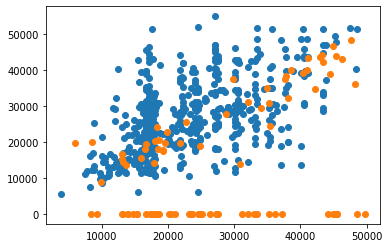

There are 543 instances or cases in which consumer finance does not fund, and it is one of the other competitors that wins the operation
There are 91 iinstances or cases in which consumer finance funds and wins the operation


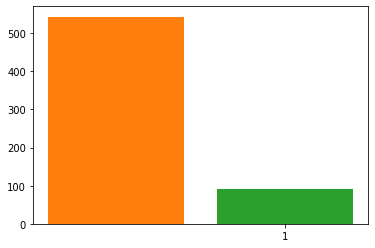

In [5]:
print('Distribution of transactions and which ones have been won by consumer finance or not')
clusters = 0,1
for cluster in clusters:
	row_ix = where(y == cluster)
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

unique, counts = np.unique(y.values, return_counts=True)
dict_class_values = dict(zip(unique, counts))
names = list(dict_class_values.keys())
values = list(dict_class_values.values())
plt.bar(range(len(dict_class_values)), list(dict_class_values.values()), align='center')
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])

print(f'There are {dict_class_values[0]} instances or cases in which consumer finance does not fund, and it is one of the other competitors that wins the operation')
print(f'There are {dict_class_values[1]} iinstances or cases in which consumer finance funds and wins the operation')